In [3]:
# LIBRARIES 
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from fbprophet import Prophet
# Statsmodels widely known for forecasting than Prophet
import statsmodels.api as sm
from scipy import stats
from plotly import tools
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# plt.style.available
plt.style.use("seaborn-whitegrid")

plt.style.use('bmh')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load the data 
from google.colab import files
uploaded = files.upload()

Saving all_stocks_5yr.csv to all_stocks_5yr.csv


In [4]:
df = pd.read_csv('all_stocks_5yr.csv')
df.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
# Get the number of trading days
df.shape
# 619040 trading days

(619040, 7)

In [6]:
# Brief description of our dataset
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [7]:
# Replace the column name from name to ticks
df = df.rename(columns={'Name': 'Ticks'})

The focus of this python notebook is to analyze only the Amazon stock.

In [8]:
# Analyzing the Amazon stocks. 
apple = df.loc[df['Ticks'] == 'AAPL']
apple.head()

,date,open,high,low,close,volume,Ticks
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [9]:
# Check whether the date is an object or date type
apple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 1259 to 2517
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Ticks   1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [10]:
# Change to date format
apple.head()

,date,open,high,low,close,volume,Ticks
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [12]:
# Create a  copy to avoid the Setting Warning .loc issue
apple_df = apple.copy()

# Change to datetime datatype.
apple_df.loc[:, 'date'] = pd.to_datetime(apple.loc[:,'date'], format="%Y/%m/%d")

In [13]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 1259 to 2517
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   Ticks   1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 78.7+ KB


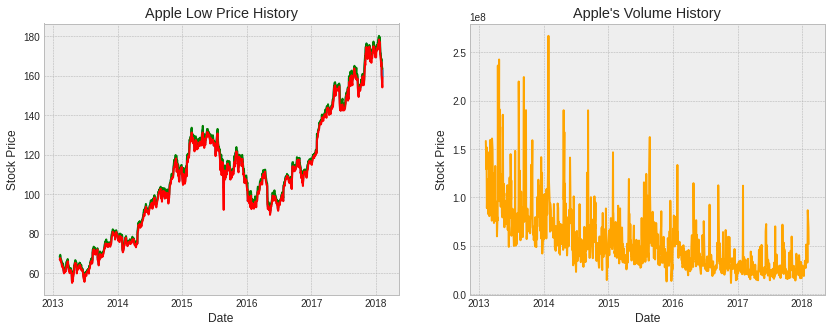

In [15]:
# Simple plotting of Apple Stock Price
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(apple_df["date"], apple_df["close"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Apple Close Price History")

# Second Subplot
ax1.plot(apple_df["date"], apple_df["high"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Apple High Price History")

# Third Subplot
ax1.plot(apple_df["date"], apple_df["low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Apple Low Price History")

# Fourth Subplot
ax2.plot(apple_df["date"], apple_df["volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Apple's Volume History")
plt.show()

We will now use **Prophet** which is Facebook's library for time series forecasting. Prophet is useful for datsets which are influenced by seasonal changes such as electric and heating bill fluctuations. But, **Prophet** is used here to forecast stock market prices for S&P 500 companies.

In [16]:
m = Prophet()

# Drop the columns
ph_df = apple_df.drop(['open', 'high', 'low','volume', 'Ticks'], axis=1)
ph_df.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)

ph_df.head()

,ds,y
1259,2013-02-08,67.8542
1260,2013-02-11,68.5614
1261,2013-02-12,66.8428
1262,2013-02-13,66.7156
1263,2013-02-14,66.6556


In [17]:
m = Prophet()

m.fit(ph_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
# Create Future dates
future_prices = m.make_future_dataframe(periods=365)

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1619,2019-02-03,223.384577,195.427716,249.423880
1620,2019-02-04,220.467153,192.116369,246.494049
1621,2019-02-05,220.978473,193.067246,247.635896
1622,2019-02-06,221.420412,192.863665,248.062094
1623,2019-02-07,221.911261,193.447621,247.924639


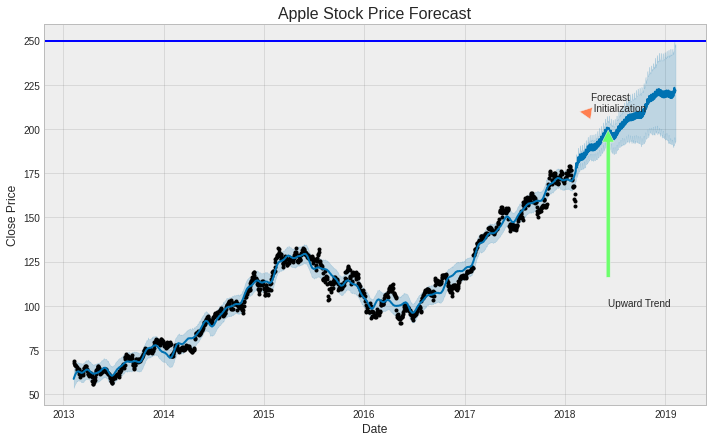

In [25]:
import matplotlib.dates as mdates
# Dates
starting_date = dt.datetime(2018, 4, 7)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2018, 6, 7)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2018, 2, 18)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Apple Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 210), xytext=(starting_date1,210),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

# Trend emphasis arrow
ax1.annotate('Upward Trend', xy=(trend_date1, 210), xytext=(trend_date1,100),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

ax1.axhline(y=250, color='b', linestyle='-')

plt.show()


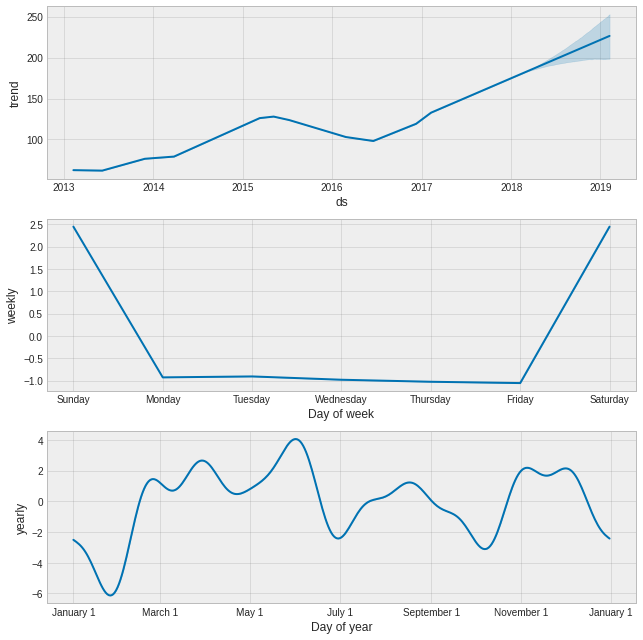

In [26]:
fig2 = m.plot_components(forecast)
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


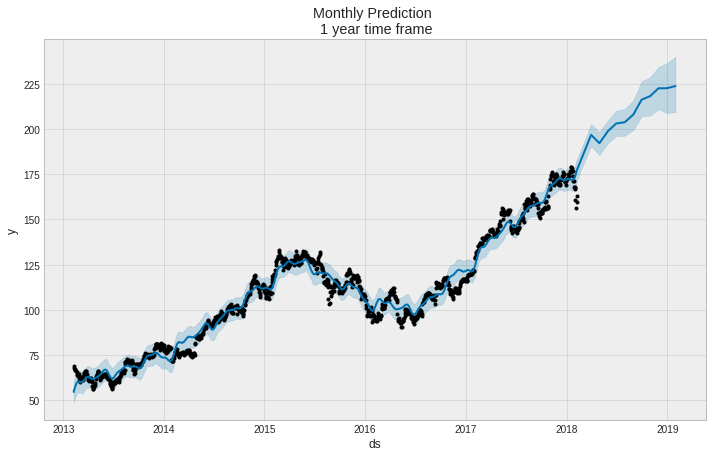

In [27]:
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.01).fit(ph_df)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()

What trends can we see here? 


*   Apple's stock price is increasing on a yearly basis. 
*   Apple's stock price increases during January.
*   There is a weekly trend for Apple's stock prices. 



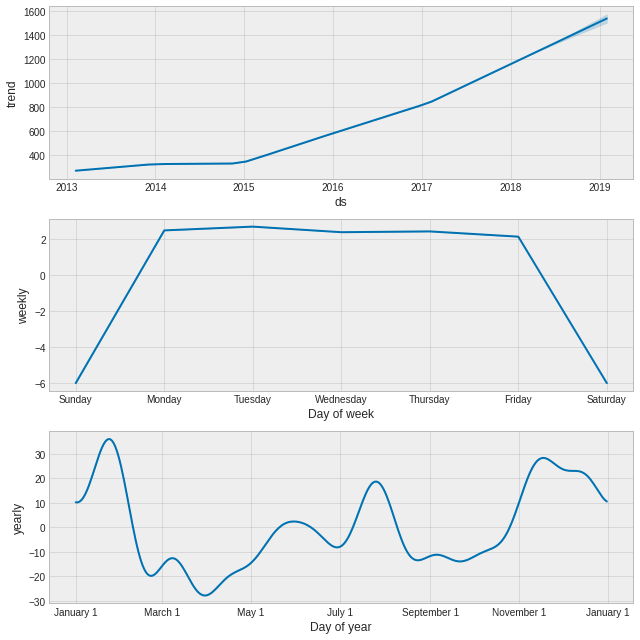

In [ ]:
fig = m.plot_components(fcst)
plt.show()